**Сборный проект 1 - Интернет - магазин компьютерных игр.**

Описание проекта

  Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
  
  Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
  
  В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**1.Изучим общую информацию**

In [1]:
import pandas as pd # импортируем библиотеки 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('/datasets/games.csv') # создадим таблицу data

In [3]:
data.head(10) # прочитаем первые десять строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info() # посмотрим объем данных, тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe() # опишем датафрейм

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Описание данных:

•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [6]:
 data.duplicated().sum() # явных дубликатов не обнаружено

0

In [7]:
data.isna().sum() # посмотрим количество пропусков в столбцах

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**2.Подготовим данные**

Приведем названия столбцов к нижнему регистру

In [8]:
 data.columns = data.columns.str.lower() # приведем названия столбцов к нижнему регистру

In [9]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
data['name'].unique() # изучич уникальные названия игр

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [11]:
data[data['name'].isna()] # в двух строчках отсутствует название
data = data.dropna(subset=['name']).reset_index(drop=True) # удалить строчки

Всего две пустые строчки, их можно удалить. На вывод и результат это не повлияет, а для работы с данными важно избавиться от такого характера, пропусков.

In [12]:
data[data['year_of_release'].isna()] # посмотрим пропуски в столбце год выпуска

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True) # удалим пропуски

Удалили 269(1,6% от 16715) строк с пропусками в столбце "год выпуска", так как логичной замены не наблюдается,что также не повлияет на результаты и выводы.

In [14]:
data['year_of_release'].unique() # посмотрим уникальные значения

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [15]:
data['genre'].unique() # посмотрим уникальные значения

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [17]:
data['critic_score'].unique() # изучим уникальные значения 

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [18]:
data['user_score'].unique() # изучим уникальные значения 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обнаружено значение "tbd" - будет определено, игровой слэнг геймеров.

In [19]:
data['user_score'] = data['user_score'].replace('tbd', 'Nan') # произведем замену tbd на nan


In [20]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'Nan', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
data['rating'].unique() # изучим значения на которые разделяют игры по возрастным категориям

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
data['platform'].unique() # изучим разновидность платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В столбцах year_of_release, преобразуем тип данных  в int, в user_score  в float. 

In [23]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data['user_score'] = pd.to_numeric(data['user_score'], downcast='float', errors ='coerce')
data['user_score'] = data['user_score'].round(1)

In [24]:
data.info() # посмотрим наши данные после обработки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: float32(1), float64(5), int16(1), object(4)
memory usage: 1.2+ MB


In [25]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [26]:
data.query('critic_score.isna()') # посмотрим пропуски в столбце "оценка критиков"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [27]:
data.query('user_score.isna()') # посмотрим пропуски в столбце "оценка пользователей"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Исходя из того что, мы видим, нельзя сказать однозначно, чем можно заменить пропуски в столбцах - critic_score,user_score. Не видно какого либо тренда зависимости от жанра,платформы, года выпуска и др. Возможно также ошибки, человеческий фактор. Допускаю что, оставить пропуски как есть, не повлияет негативно на итоговые выводы и результаты нашего исследования.

Значения столбца rating являются категориальными и обозначают рейтинги для компьютерных видеоигр и другого развлекательного
программного обеспечения в США и Канаде (ESRB). Компания была создана в 1994, а это говорит о том, что игры до 1994 скорее 
всего не имеют рейтинга, проверим это.

In [28]:
data[data['year_of_release'] < 1994].isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.991781
user_score         0.991781
rating             0.989041
dtype: float64

Практически все значения столбца rating игр, выпущенных до 1994 года пропущены (за исключенияем пары значений). Определить рейтинг игр по текущим параметрам таблицы невозможно, поэтому примем информацию к сведению и перейдем к анализу данных.

In [29]:
data['rating'] = data['rating'].fillna('unknown') # Пропуски в столбце rating заменим на "неопределен"(поставим заглушку)

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**

In [30]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] # посчитаем общие продажи по миру

In [31]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


   Мы с вами переименовали названия столбцов, точнее привели их к змеиному регистру.
Удалили 269 строк, в которых отсутствует дата выпуска и две строки без названия и типа жанра игры.
Заменили "tbd"(будет определено) в столбце "оценка пользователей" на Nan.
Пропуски в остальных столбцах оставили как есть, допуская, что причины логичной замены, отсутствуют.
Посчитали общий объем выручки по всем регионам.


In [32]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float32(1), float64(6), int16(1), object(4)
memory usage: 1.3+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en 

**3. Проведем исследовательский анализ данных**

**Посмотрим сколько игр выпускалось в разные годы? Важны ли данные за все периоды**

In [33]:
years_of_release_games = data.groupby('year_of_release')['name'].count().reset_index() # группируем методом groupby по годам названия и посчитаем их
years_of_release_games.columns = ['year','amount']
years_of_release_games

,year,amount
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


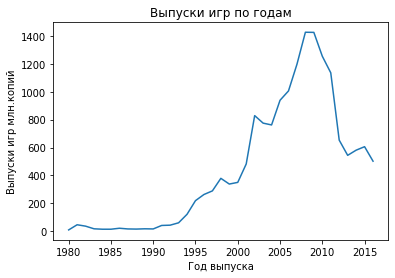

In [34]:
plt.plot(years_of_release_games['year'], years_of_release_games['amount']) # покажем график методом plot динамику выпускаемых игр по годам
plt.xlabel('Год выпуска')
plt.ylabel('Выпуски игр млн.копий')

plt.title(f'Выпуски игр по годам')
plt.show();

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Визуализация подразумевает подписи осей, название графика, при необходимости наличие меток. </font>

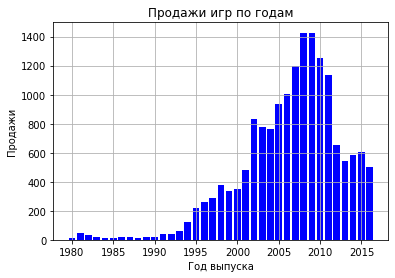

In [35]:
plt.bar(years_of_release_games['year'], years_of_release_games['amount'], label='Продажи в год', color='b')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.grid()
plt.title(f'Продажи игр по годам')
plt.show();

Если рассматривать масштаб всей отрасли, то важны все данные, вся история, с момента зарождения по текущий день.
В нашем случаем нам интересен рост объемов продаж и далее его динамика.Это период с 1993 по 2016гг.  Такой резкий рост возможно связан с тем что , компьютеры стали применятся во всех отраслях экономики и доступны большим слоям населения. Пик развития отрасли был достигнут в 2008-2009гг. Возможно после, на первые позиции выходят мобильные гаджеты со своим наполнением.

**Посмотрим как менялись продажи по платформам**

In [36]:
# Комментарий ревьюера
#Создадим таблицу platform_data и посмотрим продажи по платформам методом groupby

platform_data = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_data

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [37]:
top_platform = platform_data.head(10) # выделим топ 10 платформ по продажам
top_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [38]:
top_platform_name = top_platform['platform'].to_list() # Создадим список лучших платформ
top_platform_name

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

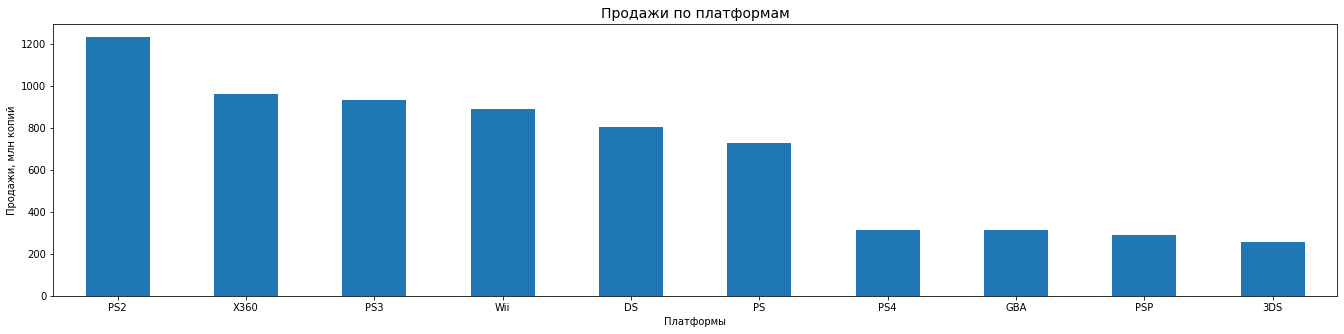

In [39]:
ax=top_platform.plot(x='platform', y='total_sales', kind='bar', figsize=(23, 5), rot=360)# Продажи по платформам
ax.get_legend().remove()
plt.title('Продажи по платформам', size=14)
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн копий')
plt.show()

In [40]:
#Создадим новый датасет, отфильтровав старый по названиям платформ, хранящимся в переменной
data_new_top = data.query('platform in @top_platform_name')
data_new_top.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


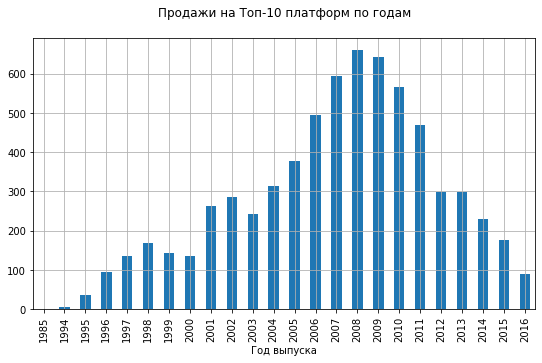

In [41]:
data_new_top.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='bar', figsize=(9,5))
plt.title('Продажи на Топ-10 платформ по годам\n  ')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show();

In [42]:
data_new_top_years = data_new_top.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
data_new_top_years['platform'].value_counts()

X360    12
PS2     12
PSP     12
PS3     11
DS      11
Wii     11
PS      10
GBA      8
3DS      6
PS4      4
Name: platform, dtype: int64

**В среднем продолжительность жизни платформ 9,7(10)лет**

**Возьмем данные за соответствующий актуальный период**

 Для прогноза на 2017 возьмем данные за период с 2012 по 2016гг(5лет). Допустим что исследование последних периодов покажут картину приближенную к реальности. В настоящее время все быстро меняется - векторы, тренды.

In [43]:
#Сводная таблица количества игр для каждой платформы по годам в актуальный период
data.query('year_of_release > 2011').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='.')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,93.0,91.0,80.0,86.0,46.0
DS,23.0,8.0,.,.,.
PC,61.0,38.0,47.0,50.0,54.0
PS3,148.0,126.0,108.0,73.0,38.0
PS4,.,16.0,75.0,137.0,164.0
PSP,106.0,54.0,10.0,3.0,.
PSV,53.0,63.0,100.0,110.0,85.0
Wii,31.0,12.0,6.0,4.0,1.0
WiiU,32.0,42.0,31.0,28.0,14.0


 Таблица по количеству выпускаемых игр на данных платформах:
Новая платформа PS4 (2013г) явный лидер показывает хорошую динамику роста за 4 года жизни.

Также XOne Новая платформа(2013г) выпускает игры, динамично растет из года в год.


**Создадим датасет за актуальный период с 2012 по 2016гг -  data_base. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

In [44]:
data_base = data.query('year_of_release > 2011') # Создадим новую таблицу с актуальным периодом 2012-2016гг.
data_base.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


**Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

In [45]:
# продажи за 2012-2016гг сохраним в data_base_sales
data_base.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value='.') 


year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,.,.,.
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.6
PS4,.,25.99,100.0,118.9,69.25
PSP,7.69,3.14,0.24,0.12,.
PSV,16.19,10.59,11.9,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.6


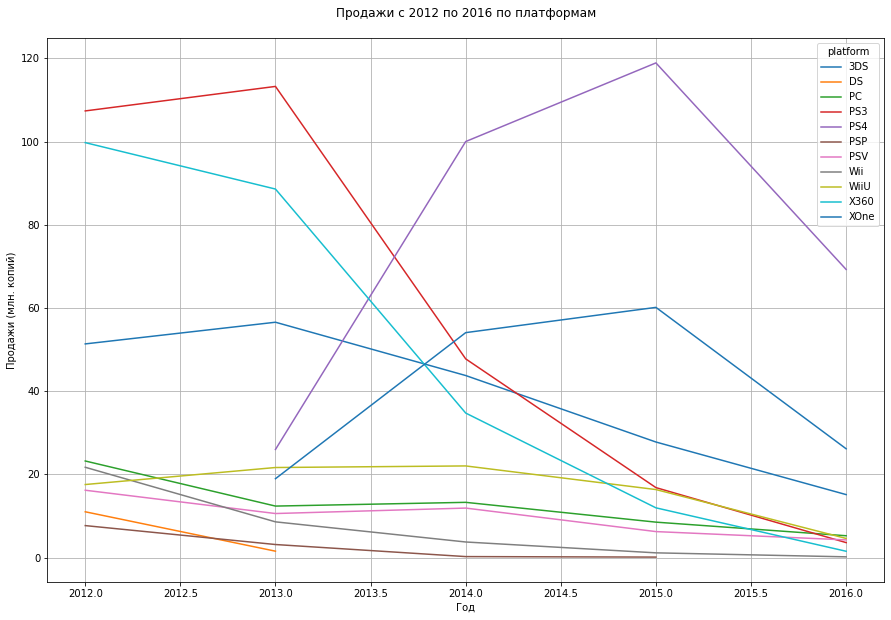

In [46]:
#Построим графики динамики продаж по платформам за актуальный период

pd.pivot_table(data_base, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,10))
plt.grid(True)
plt.title('Продажи с 2012 по 2016 по платформам\n  ')
plt.xlabel('Год')
plt.ylabel('Продажи (млн. копий)')
plt.show()


В целом по отрасли, тренд на лицо  - продажи падают по платформам. можно выделить следующие платформы "PS4", "XOne", "PC", "PSV", "3DS", допустим что они имеют потенциал к росту. Лучше всех себя чувствуют "PS4" и "XOne".

In [47]:
leader_platforms = ["PS4", "XOne", "PC", "PSV", "3DS"] # сохраним отдельно лидирующие платформы
# посчитаем общие продажи по лидирующим 5 платформам
lead5_platform = data_base.query('platform in @leader_platforms').groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
lead5_platform

,platform,total_sales
0,PS4,314.14
1,3DS,194.61
2,XOne,159.32
3,PC,62.65
4,PSV,49.18


**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.**

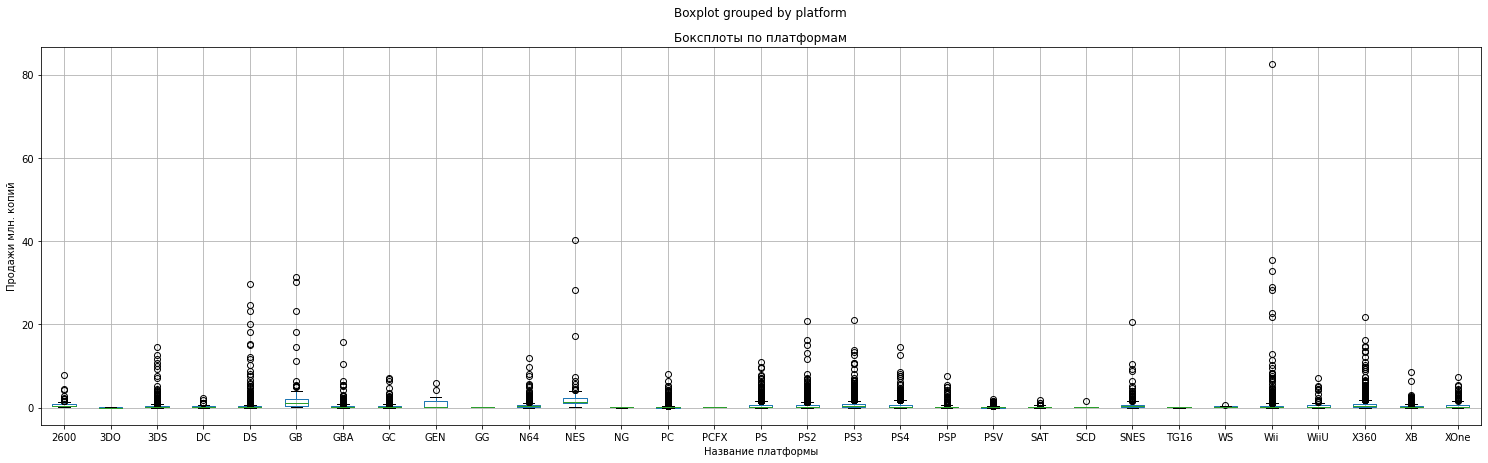

In [48]:
data.boxplot(column='total_sales', by='platform', figsize=(25,7)) # построим боксплоты по всему датасету
plt.title('Боксплоты по платформам')
plt.ylabel('Продажи млн. копий')
plt.xlabel('Название платформы');
plt.show()

В представленной диаграмме мы видим, что есть очень редкие выбросы с продажами в 80 млн (видимо эта игра была очень популярная игра), так же редкие, в отличии от других, выбросы есть в диапазоне от 20 до 40 млн. 

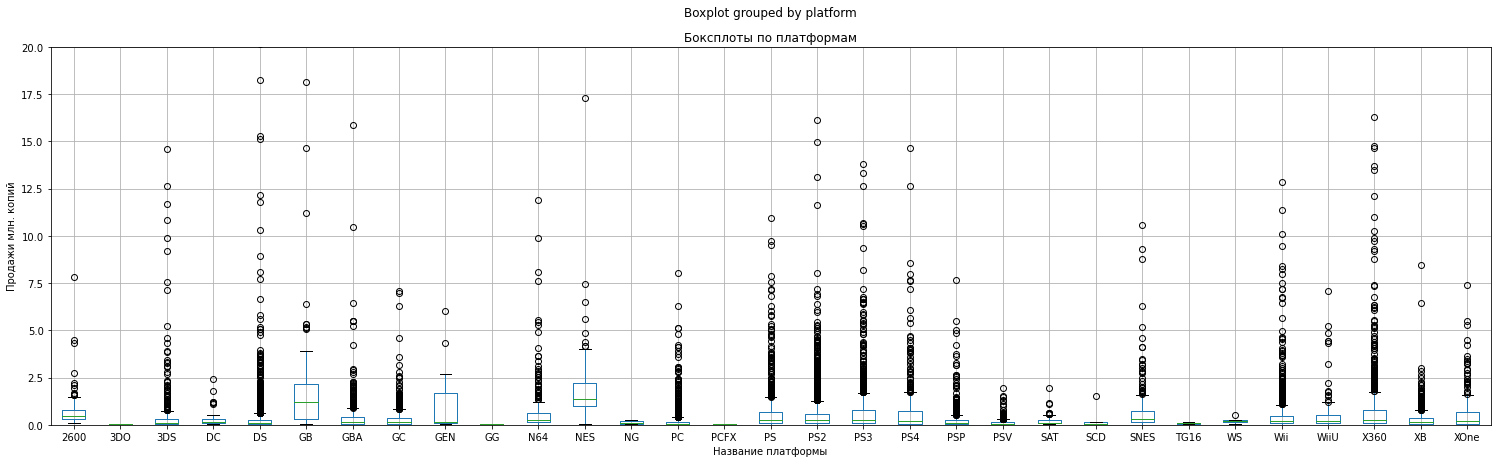

In [49]:
# теперь сужаем диапазон до 20 млн продаж
data.boxplot(column='total_sales', by='platform', figsize=(25,7))
# подгоняем данные по стороне 'Y'
plt.ylim(0, 20)
plt.title('Боксплоты по платформам')
plt.ylabel('Продажи млн. копий')
plt.xlabel('Название платформы');
plt.show()

В этой выгрузке так же у всех позиций есть редкие выбросы, что нам не нужно. Если и оставлять выбросы, то они должны быть максимально частыми, которые будут полезны статистике. Мы уже близки к нашей финальной визуализации.

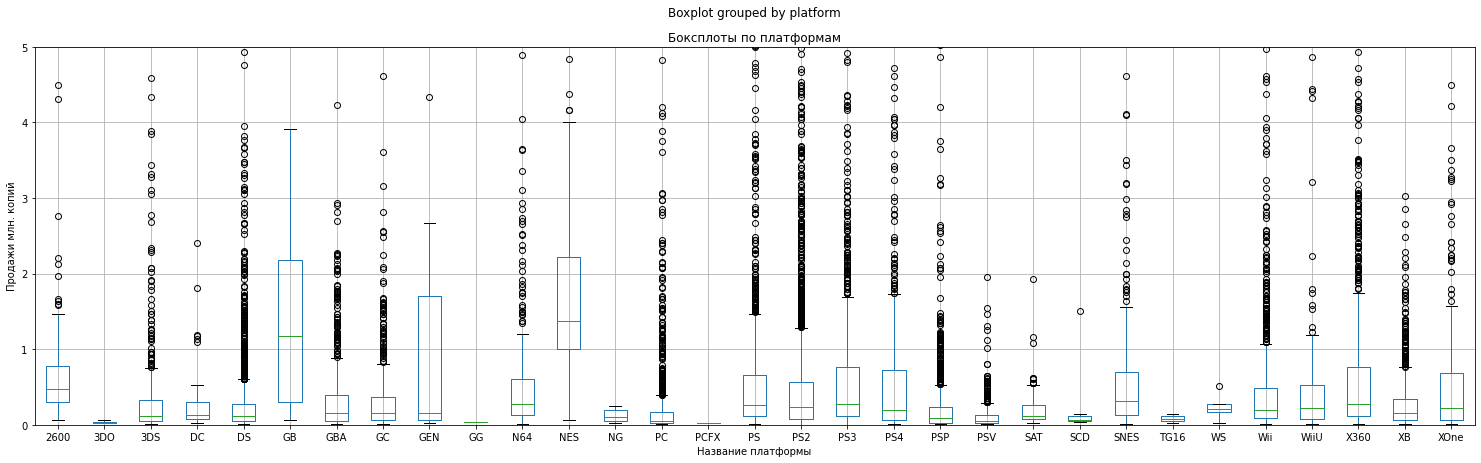

In [50]:
# сужаем диапазон до 5 млн продаж
data.boxplot(column='total_sales', by='platform', figsize=(25,7))
# подгоняем данные по стороне 'Y'
plt.title('Боксплоты по платформам')
plt.ylabel('Продажи млн. копий')
plt.xlabel('Название платформы');
plt.ylim(0, 5)
plt.show()

Максимальные медианные значения у Nes, GB,2600. Медианные значения у PS,PS2,PS3,PS4,X360, XOne примерно на уровне 0,3-0,4.Средняя стабильность относительно других платформ Здесь уже видно что , не все так однозначно по лидерам ,это значит хорошо что мы взяли период за последние пять лет.
Это действительно актуально для рекомендации для отдела маркетинга на 2017г, так как бюджет явно не резиновый.

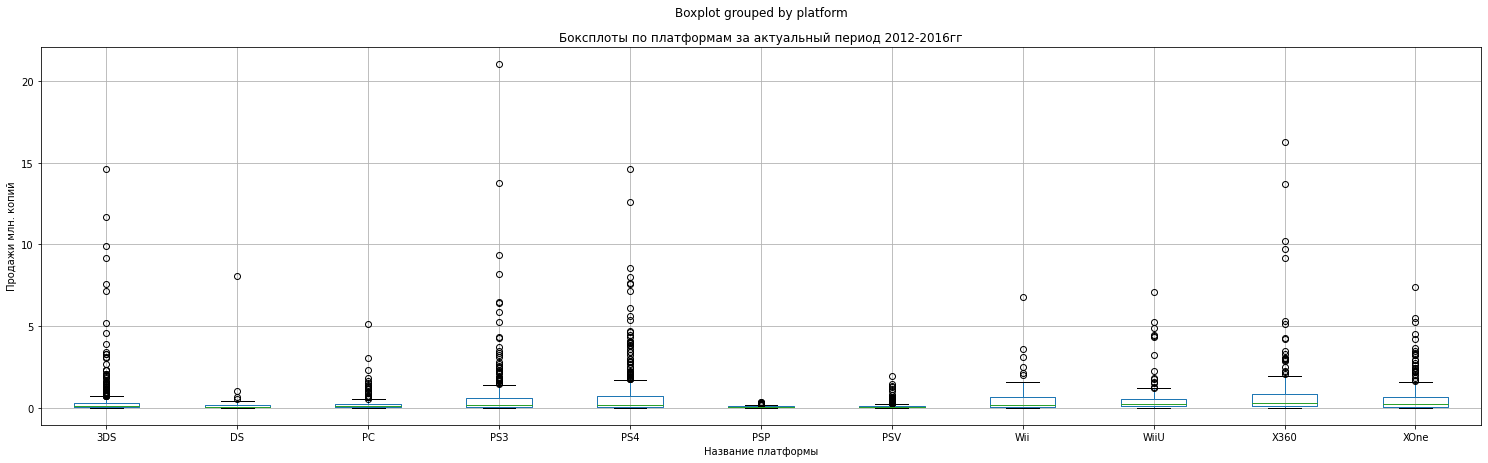

In [51]:
data_base.boxplot(column='total_sales', by='platform', figsize=(25,7)) # построим боксплоты по актуальному периоду 2012-2016гг
plt.title('Боксплоты по платформам за актуальный период 2012-2016гг')
plt.ylabel('Продажи млн. копий')
plt.xlabel('Название платформы');
plt.show()

В представленной диаграмме мы видим что в платформах 3DS,PS3, PS4, X360, XOne большое количество выбросов. Конкретные игры в различных платформах пользуются высоким спросом.

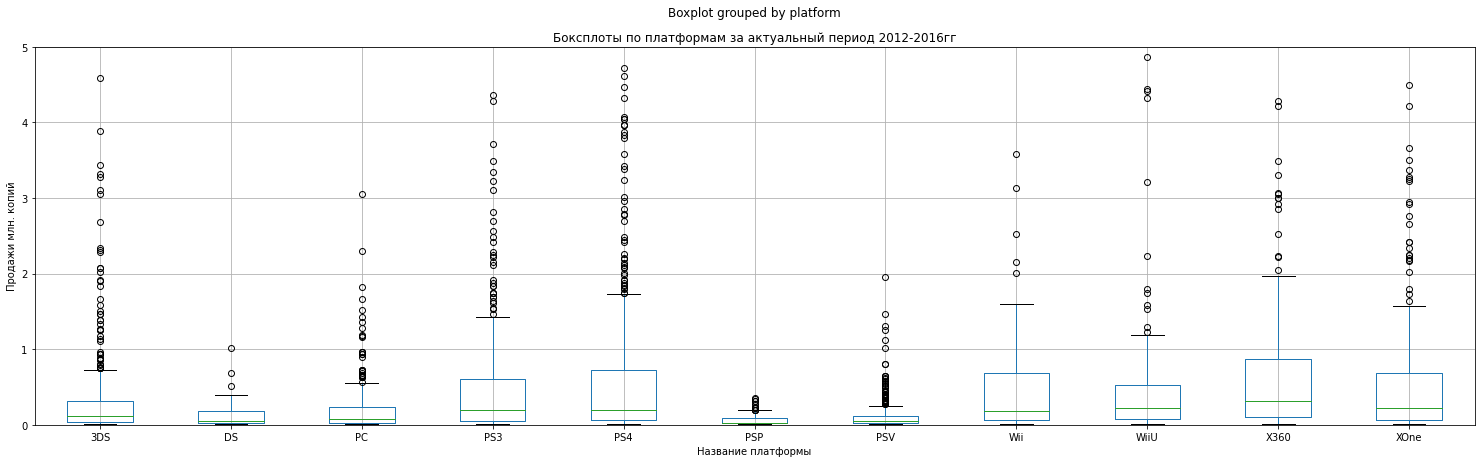

In [52]:
# сужаем диапазон до 5 млн продаж
data_base.boxplot(column='total_sales', by='platform', figsize=(25,7)) # построим боксплоты по актуальному периоду 2012-2016гг
plt.title('Боксплоты по платформам за актуальный период 2012-2016гг')
plt.ylabel('Продажи млн. копий')
plt.xlabel('Название платформы');
plt.ylim(0, 5)
plt.show()

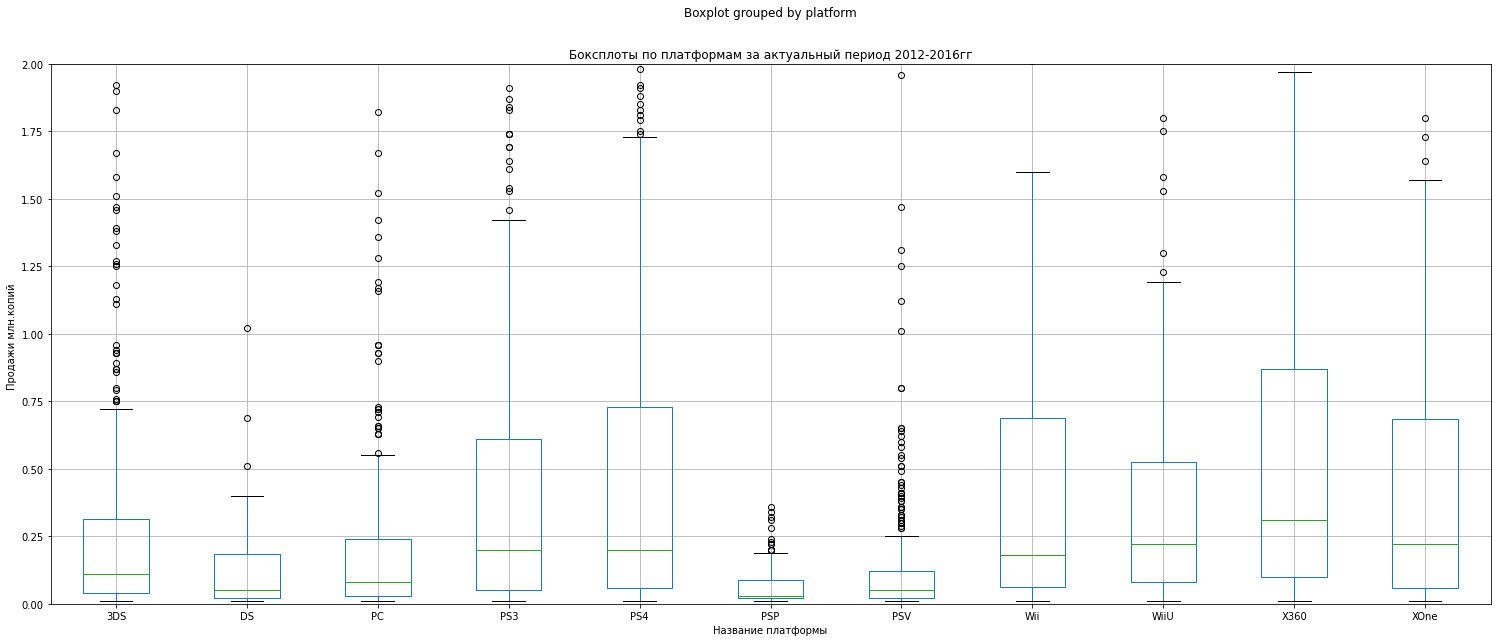

In [53]:
# сужаем диапазон до 2 млн продаж
data_base.boxplot(column='total_sales', by='platform', figsize=(25,10)) # построим боксплоты по актуальному периоду 2012-2016гг
plt.title('Боксплоты по платформам за актуальный период 2012-2016гг')
plt.ylabel('Продажи млн.копий ')
plt.xlabel('Название платформы');
plt.ylim(0,2)
plt.show()

У X360 медианное значение самое большое - примерно 0,3 млн, говорит о стабильности в продажах игр. PS3,PS4,Wii,XOne, 3DS - в играх на этих платформах стабильно в пределах 0,15-0,25млн

In [54]:
# опишем датасет методом describe
data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,116.0,0.745517,0.956160,0.07,0.3075,0.480,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2121.0,0.378491,1.436042,0.01,0.0500,0.110,0.2700,29.80
GB,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
GBA,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
GC,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


In [55]:
# опишем актуальные данные методом describe
data_base.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


Лидером продаж является PlayStation 4, но и размах продаж по годам у нее самый большой - во второй год с момента выпуска ее популярность выросла почти в 2 раза. 

ПК является самой непопулярной платформой, но и самой стабильной - размах самый узкий. Среднее число продаж игр для десктопов самое низкое и доля бестселлеров самая маленькая.

В целом не все так однозначно, как первый взгляд.

Выбросы на боксплотах - это какие-то суперопулярные игры. 

**Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**

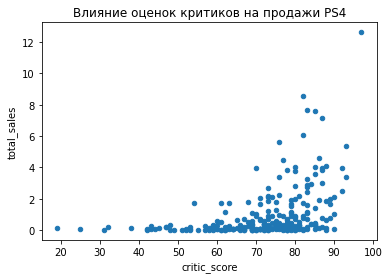

In [56]:
data_base[data_base['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter') # Диаграмма рассеивания по отзывам критиков
plt.title('Влияние оценок критиков на продажи PS4')
plt.show()

In [57]:
data_ps4 = data_base[data_base['platform']=='PS4']
data_ps4_cor = data_ps4['critic_score'].corr(data_ps4['total_sales']) # Посчитаем корреляцию
data_ps4_cor

0.40656790206178095

Корреляция в 0.39 говорит о наличии связи, однако не слишком сильной. Выходит, отзывы критиков сопровождаются ростом продаж, и все же так бывает не всегда.

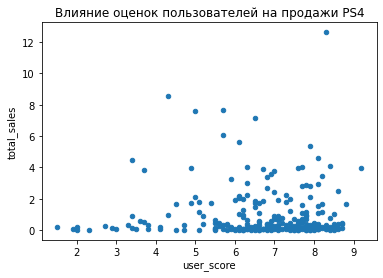

In [58]:
data_base[data_base['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter') # Диаграмма рассеивания по отзывам пользователей
plt.title('Влияние оценок пользователей на продажи PS4')
plt.show()

In [59]:
data_ps4 = data_base[data_base['platform']=='PS4']
data_ps4_cor = data_ps4['user_score'].corr(data_ps4['total_sales']) # Посчитаем корреляцию
data_ps4_cor

-0.031957109005188264

Значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе. Возможно, что коэффициент нулевой не потому, 
что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер. Потому-то коэффициент корреляции 
такую связь не берёт.

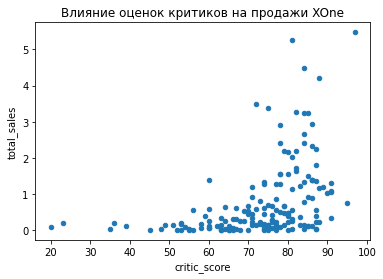

In [60]:
data_base[data_base['platform']=='XOne'].plot(x='critic_score', y='total_sales', kind='scatter') # Диаграмма рассеивания по отзыва
plt.title('Влияние оценок критиков на продажи XOne')
plt.show()

In [61]:
data_XOne = data_base[data_base['platform']=='XOne']
data_XOne_cor = data_XOne['critic_score'].corr(data_XOne['total_sales']) # Посчитаем корреляцию
data_XOne_cor

0.4169983280084017

Корреляция в 0.43 говорит о наличии связи сильнее чем у PS4. В данном случае, отзывы критиков немного сильнее влияют на 
рост продаж

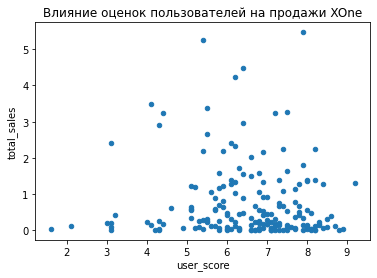

In [62]:
data_base[data_base['platform']=='XOne'].plot(x='user_score', y='total_sales', kind='scatter') # Диаграмма рассеивания по отзыва
plt.title('Влияние оценок пользователей на продажи XOne')
plt.show()

In [63]:
data_XOne = data_base[data_base['platform']=='XOne'] # Посчитаем корреляцию
data_XOne_cor = data_XOne['user_score'].corr(data_XOne['total_sales']) # Посчитаем корреляцию
data_XOne_cor

-0.06892505319711206

Также мы видим что значение близко к нулю, что говорит об отсутствии корреляции. Отзывы пользователей оказывают не заметное
влияние на продажи игр на платформе XOne.

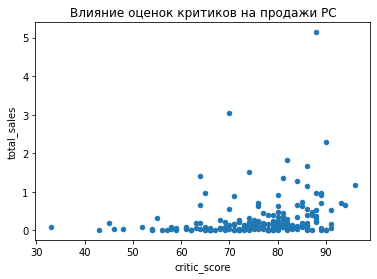

In [64]:
data_base[data_base['platform']=='PC'].plot(x='critic_score', y='total_sales', kind='scatter') # Диаграмма рассеивания по отзывам критиков
plt.title('Влияние оценок критиков на продажи PC')
plt.show()

In [65]:
data_PC = data_base[data_base['platform']=='PC']
data_PC_cor = data_PC['critic_score'].corr(data_PC['total_sales']) # Посчитаем корреляцию
data_PC_cor

0.23724324311567915

Корреляция 0,37 - это значит что корреляция присутствует и оказывает некоторое влияние на рост продаж.

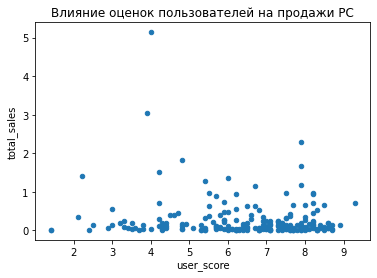

In [66]:
data_base[data_base['platform']=='PC'].plot(x='user_score', y='total_sales', kind='scatter') # Диаграмма рассеивания по отзывам критиков
plt.title('Влияние оценок пользователей на продажи PC')
plt.show()

In [67]:
data_PC = data_base[data_base['platform']=='PC']
data_PC_cor = data_PC['user_score'].corr(data_PC['total_sales']) # Посчитаем корреляцию
data_PC_cor

-0.12186748061872194

У платформы PC корреляция с отзывами пользователей 0,15 . Не равно нулю , очень слабая и все же проглядывается.И следовательно 
оказывает минимальное влияние на продажи PC.

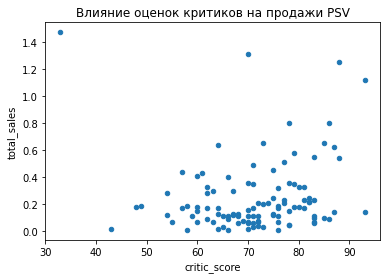

In [68]:
data_base[data_base['platform']=='PSV'].plot(x='critic_score', y='total_sales', kind='scatter') # Диаграмма рассеивания по отзывам критиков
plt.title('Влияние оценок критиков на продажи PSV')
plt.show()

In [69]:
data_PSV = data_base[data_base['platform']=='PSV']
data_PSV_cor = data_PSV['critic_score'].corr(data_PSV['total_sales']) # Посчитаем корреляцию
data_PSV_cor

0.0944878992931617

Корреляция близка к нулю. Влияние на продажи соответственное. Нулевое.

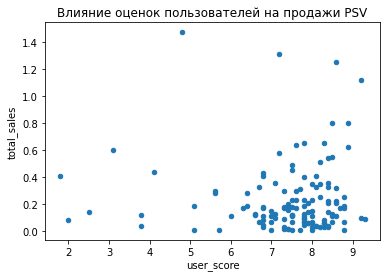

In [70]:
data_base[data_base['platform']=='PSV'].plot(x='user_score', y='total_sales', kind='scatter') # Диаграмма рассеивания по отзывам критиков
plt.title('Влияние оценок пользователей на продажи PSV')
plt.show()

In [71]:
data_PSV = data_base[data_base['platform']=='PSV']
data_PSV_cor = data_PSV['user_score'].corr(data_PSV['total_sales']) # Посчитаем корреляцию
data_PSV_cor

-0.004339454898299734

Корреляция 0,078. Все таки отлична от нуля. Можно сделать вывод что на продажи PSV, оценки пользователей влияют значительнее по сравнению с оценками критиков, где корреляция почти равна нулю.

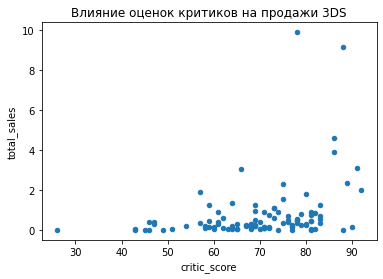

In [72]:
data_base[data_base['platform']=='3DS'].plot(x='critic_score', y='total_sales', kind='scatter') # Диаграмма рассеивания по отзывам критиков
plt.title('Влияние оценок критиков на продажи 3DS')
plt.show()

In [73]:
data_3ds = data_base[data_base['platform']=='3DS']
data_3ds_cor = data_3ds['critic_score'].corr(data_3ds['total_sales']) # Посчитаем корреляцию
data_3ds_cor

0.3208028695360785

У платформы 3DS видна слабая корреляция 0,177. Тренд подтверждается - оценка критиков незначительно влияет на рост продаж.

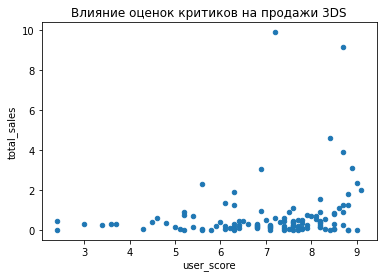

In [74]:
data_base[data_base['platform']=='3DS'].plot(x='user_score', y='total_sales', kind='scatter') # Диаграмма рассеивания по отзывам критиков
plt.title('Влияние оценок критиков на продажи 3DS')
plt.show()

In [75]:
data_3ds = data_base[data_base['platform']=='3DS']
data_3ds_cor = data_3ds['user_score'].corr(data_3ds['total_sales']) # Посчитаем корреляцию
data_3ds_cor

0.19758261153521017

Платформа 3DS , ее корреляция оценок пользователей - 0,19 также слабая и при этом выше чем корреляция оценок критиков

Исходя из выше изложенного можно сделать следующие выводы. Оценка критиков в целом влияет сильнее на рост продаж, по сравнению с оценкой пользователей. и при этом в отдельно взятых платформах ситуция выглядит противоположной, как это видно на примере платфоры PSV. 

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [76]:
# Комментарий ревьюера
temp1, temp2 = data_base.total_sales.sum(), data[data.year_of_release > 2014].total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1446.5300000000002, 397.92, -263.52)

In [77]:
data_base['genre'].value_counts() # посмотрим типы жанров

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

**Жанр Action сильно отличается разнообразием игр, в три раза больше вариантов по сравнению с Role-Playing 1031 против 370. Можно выделить топ жанров по количеству игр: Action, Role-Playing, Adventure, Sports,Shooter.**

In [78]:
data_base.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


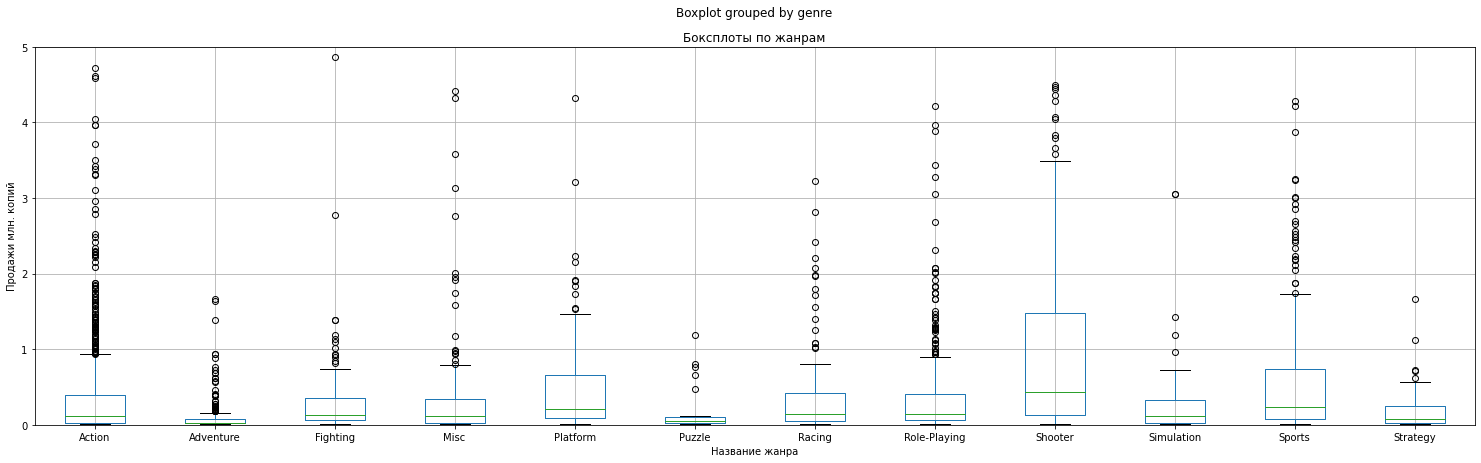

In [79]:
# построим диаграмму размаха по жанрам за актуальный период
data_base.boxplot(column='total_sales', by='genre', figsize=(25,7))
# подгоняем данные по стороне 'Y'
plt.title('Боксплоты по жанрам')
plt.ylabel('Продажи млн. копий')
plt.xlabel('Название жанра');
plt.ylim(0, 5)
plt.show()

Сделаем сравнение медианных продаж, проиллюстрировав их диаграммами размаха. У Action заметно много выбросов. У Shoote самые высокие медианные продажи.

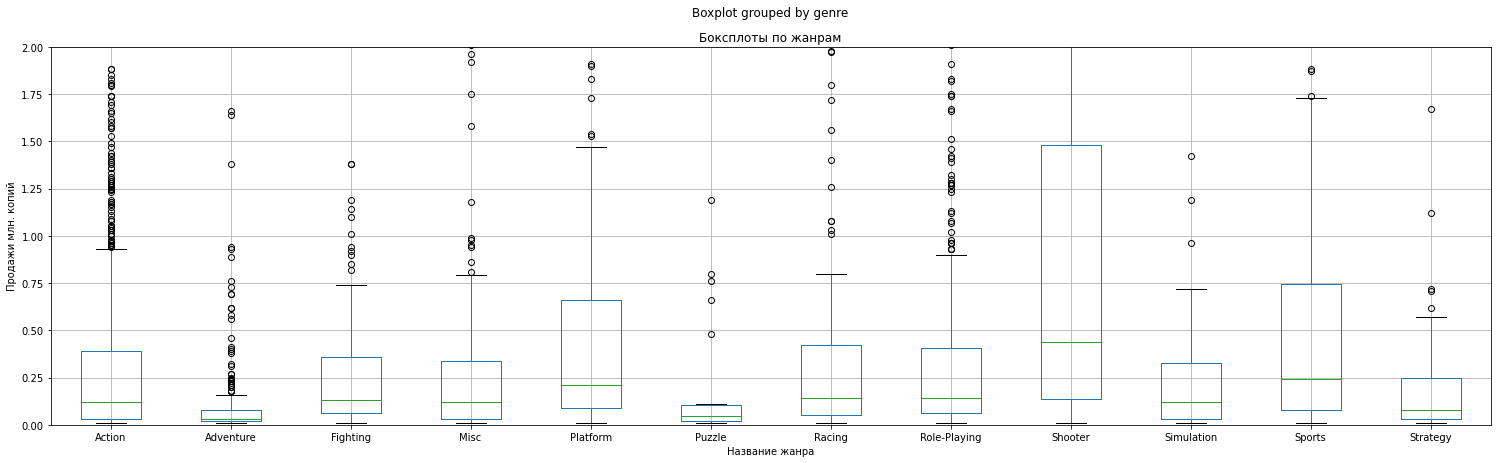

In [80]:
# построим диаграмму размаха по жанрам за актуальный период 2млн
data_base.boxplot(column='total_sales', by='genre', figsize=(25,7))
# подгоняем данные по стороне 'Y'
plt.title('Боксплоты по жанрам')
plt.ylabel('Продажи млн. копий')
plt.xlabel('Название жанра');
plt.ylim(0, 2)
plt.show()

Убрали выбросы. Помимо Shooter, у Sports, Platform медианные продажи на уровне 0,25млн, далее идут action, Misc, Fighting,
Racing, Simulator.

In [81]:
data_base.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,1031.0,0.427856,1.166504,0.01,0.030,0.120,0.3900,21.05
Adventure,302.0,0.097450,0.208237,0.01,0.020,0.030,0.0775,1.66
Fighting,109.0,0.408165,0.910385,0.01,0.060,0.130,0.3600,7.55
Misc,192.0,0.442917,1.081047,0.01,0.030,0.120,0.3375,9.18
Platform,85.0,0.717647,1.364413,0.01,0.090,0.210,0.6600,9.90
Puzzle,28.0,0.174643,0.305438,0.01,0.020,0.045,0.1025,1.19
Racing,115.0,0.465217,0.888664,0.01,0.050,0.140,0.4200,7.09
Role-Playing,370.0,0.521081,1.315937,0.01,0.060,0.140,0.4075,14.60
Shooter,235.0,1.296723,2.251662,0.01,0.135,0.440,1.4800,14.63


In [82]:
data_genre = data_base.groupby(['genre'])\
                        .agg({'total_sales':'sum', 'name':'count'})\
                        .rename(columns={'name':'name_count'})\

data_genre.sort_values(by = 'total_sales', ascending=False)

,total_sales,name_count
genre,,
Action,441.12,1031
Shooter,304.73,235
Role-Playing,192.80,370
Sports,181.07,268
Misc,85.04,192
Platform,61.00,85
Racing,53.50,115
Fighting,44.49,109
Simulation,35.12,80


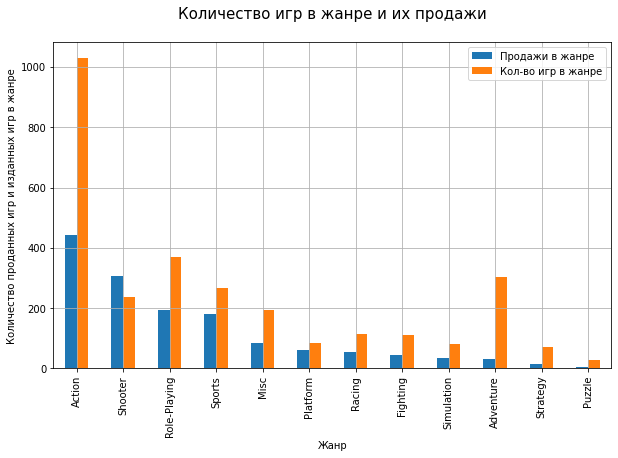

In [83]:
ax=data_genre[['total_sales', 'name_count']].sort_values(by = 'total_sales', ascending=False).plot(kind='bar', figsize=(10, 6))

plt.title('Количество игр в жанре и их продажи\n  ', fontsize=15)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр и изданных игр в жанре')
plt.legend(['Продажи в жанре', 'Кол-во игр в жанре'])
plt.grid(True)
plt.show()


Подытожим.
В результате мы определили актульный период 2012-2016гг(5 лет), так как рынок изменяется очень динамично и предыдущие ранние периоды могут быть просто не информативными.

Оценки критиков сильнее коррелируют с ростом продажи по сравнению с оценками пользователей. Есть также платформы где наблюдается обратная ситуация. В целом это слабая корреляция, либо ее отсутствие

Сравнив медианные продажи можно выделить лидера жанр Shooter , он показывает себя как стабильный жанр в который можно инвестировать рекламные бюджеты, за ним следуют жанры Sports и Platform, и только потом идут жанры Action, Racing, Role-Plyaing, Misc.

Как видим диаграмма размаха помогла нам рассмотреть данные с другого ракурса.


   **4. Составим портрет пользователя каждого региона**

Определим для пользователя каждого региона (NA -Северная Америка, EU - Европа, JP - Япония)

•	Самые популярные платформы (топ-5). Опишим различия в долях продаж.

•	Самые популярные жанры (топ-5). Поясните разницу.

•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [84]:
platform_na_all = data_base.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5) # топ 5 плтаформ NA

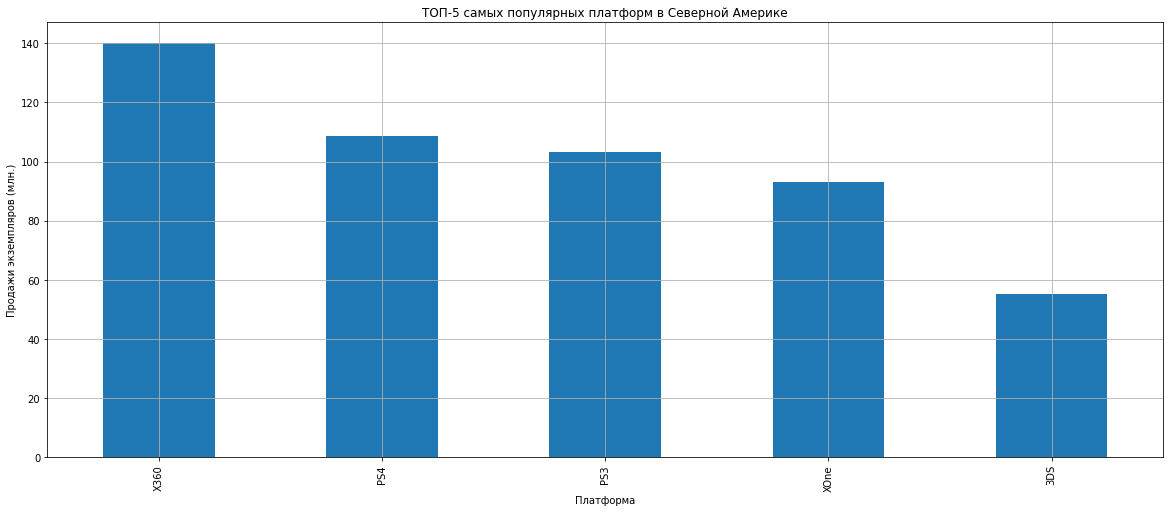

In [85]:
platform_na_all.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')

plt.xlabel('Платформа')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Северной Америке топ 5 платформ - X360(140.05млн.копий) и PS4(108.74млн копий) лидеры и далее идут платформы - PS3(103.38 млн.копий),XOne(93,12млн.копий), 3DS(55.31млн.копий) .

In [86]:
platform_na_all

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

In [87]:
platform_eu_all = data_base.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5) # топ 5 плтаформ EU

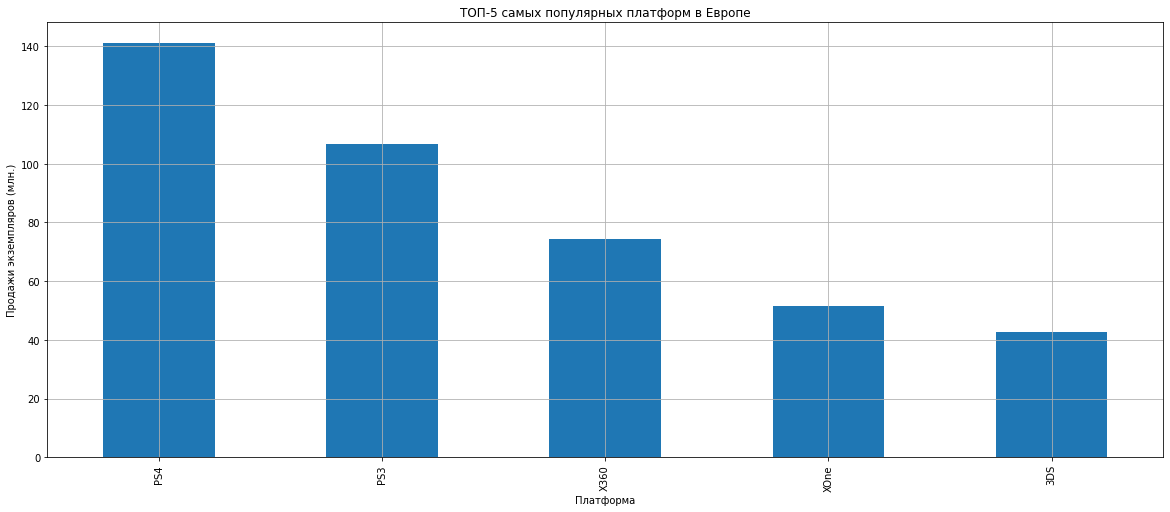

In [88]:
platform_eu_all.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')

plt.xlabel('Платформа')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Европе также лидируют платформы PS4(141,09млн.копий) и  PS3(106,86 млн.копий), X360(74.52 млн.копий),XOne(51.59 млн.копий),  закрывает топ5-  3DS(42.64 млн.копий), 

In [89]:
platform_eu_all

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

In [90]:
platform_jp_all = data_base.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5) # топ 5 плтаформ jp

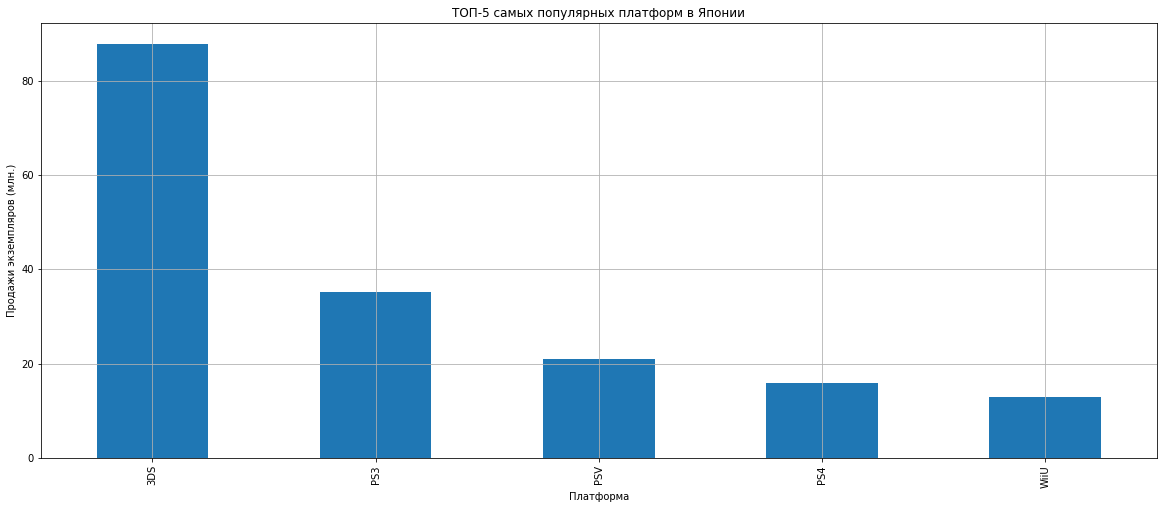

In [91]:
platform_jp_all.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Японии')

plt.xlabel('Платформа')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Японии платформа 3DS(87,79млн.копий) лидирует по продажам, PS3(35,29млн.копий) занимает 2место, затем идут PSV(21,04 млн.копий), PS4(15.96 млн.копий), WiiU(13.01 млн.копий)

In [92]:
platform_jp_all

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

Посмотрим топ 5 популярных платформ в других регионах

In [93]:
platform_other_all = data_base.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5) # топ 5 плтаформ other

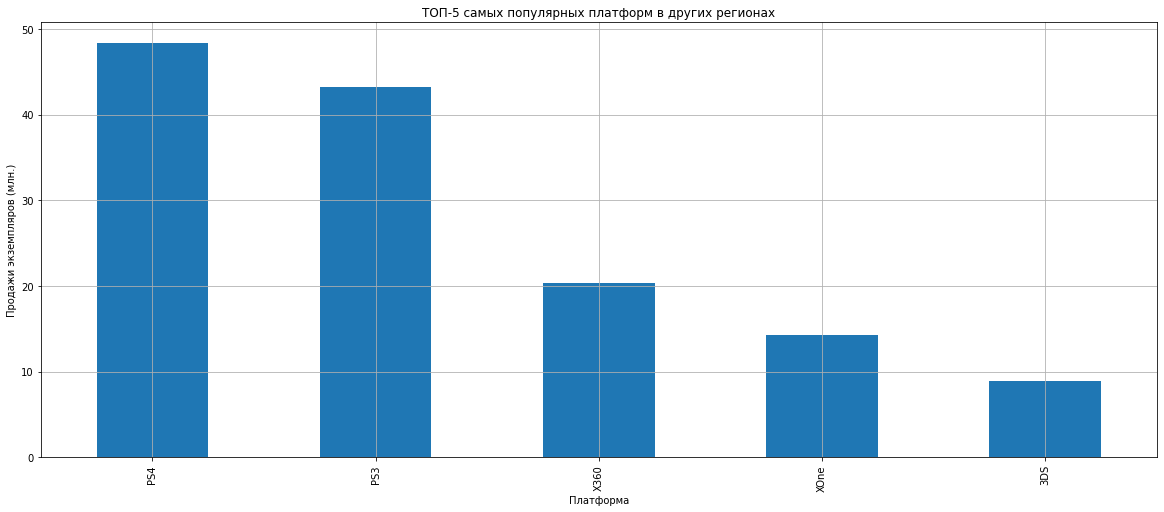

In [94]:
platform_other_all.plot(x = 'platform', y = 'other_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в других регионах')

plt.xlabel('Платформа')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В других регионах платформа PS4(48.35млн.копий) лидирует по продажам, PS3(43.26млн.копий) занимает 2место, затем идут X360(20.40 млн.копий), XOne(14.27 млн.копий), 3DS(8.87 млн.копий)

In [95]:
platform_other_all

platform
PS4     48.35
PS3     43.26
X360    20.40
XOne    14.27
3DS      8.87
Name: other_sales, dtype: float64

<AxesSubplot:title={'center':'NA - Северная Америка'}, ylabel='na_sales'>

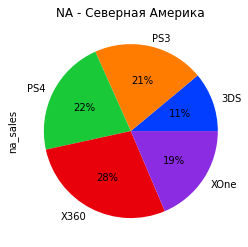

In [96]:
# применим цвета из библиотеки Seaborn (define Seaborn color palette to use)
colors = sns.color_palette('bright')[ 0:5 ]

#круговая диаграмма (create pie chart)
platform_na_all.groupby(['platform']).sum().plot(
    kind='pie', y='na_sales', 
  autopct='%1.0f%%', colors=colors,
    title='NA - Северная Америка')

В Северной Америке доли распределяются в следующем порядке  Х360 - 28%, PS4 - 22%, PS3 - 21%, XOne - 19%, 3DS - 11%.
Выделяем из Топ5(NA), игры на платформе X360 и PS4.

<AxesSubplot:title={'center':'EU - Европа'}, ylabel='eu_sales'>

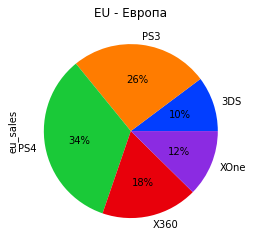

In [97]:
# применим цвета из библиотеки Seaborn (define Seaborn color palette to use)
colors = sns.color_palette('bright')[ 0:5 ]

#круговая диаграмма (create pie chart)
platform_eu_all.groupby(['platform']).sum().plot(
    kind='pie', y='eu_sales', 
  autopct='%1.0f%%', colors=colors,
    title='EU - Европа')

В Европе доли распределяются в следующем порядке  PS4 - 34%,  PS3 - 26%, Х360 - 18%,XOne - 12%, 3DS - 10%.
Выделяем из Топ5(EU), игры на платформе PS4 и PS3.

<AxesSubplot:title={'center':'JP - Япония'}, ylabel='jp_sales'>

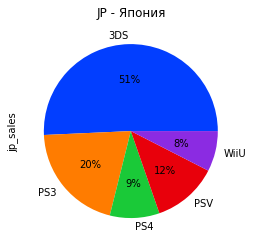

In [98]:
# применим цвета из библиотеки Seaborn (define Seaborn color palette to use)
colors = sns.color_palette('bright')[ 0:5 ]

#круговая диаграмма (create pie chart)
platform_jp_all.groupby(['platform']).sum().plot(
    kind='pie', y='jp_sales', 
  autopct='%1.0f%%', colors=colors,
    title='JP - Япония')

В Японии доли распределяются в следующем порядке  3DS - 51%,  PS3 - 20%, PS4 - 9%,PSV - 12%, WiiU - 8%.
Выделяем из Топ5(JP), игры на платформе 3DS и PS3.

<AxesSubplot:title={'center':'Other - Дргуие регионы'}, ylabel='other_sales'>

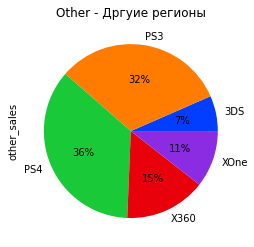

In [99]:
# применим цвета из библиотеки Seaborn (define Seaborn color palette to use)
colors = sns.color_palette('bright')[ 0:5 ]

#круговая диаграмма (create pie chart)
platform_other_all.groupby(['platform']).sum().plot(
    kind='pie', y='other_sales', 
  autopct='%1.0f%%', colors=colors,
    title='Other - Дргуие регионы')

В Европе доли распределяются в следующем порядке  PS4 - 36%,  PS3 - 32%, Х360 - 15%,XOne - 11%, 3DS - 7%.
Выделяем из Топ5(EU), игры на платформе PS4 и PS3.

**Посмотрим доли по регионам к мировым продажам**

In [100]:
platform_all = data_base.groupby('platform')['total_sales'].sum() #  Итого продаж по платформе

In [101]:
percent_na = platform_na_all / platform_all * 100
percent_na

platform
3DS     28.420944
DS            NaN
PC            NaN
PS3     35.797638
PS4     34.615140
PSP           NaN
PSV           NaN
Wii           NaN
WiiU          NaN
X360    59.207745
XOne    58.448406
dtype: float64

В Северной Америке доля продаж от мировых продаж в разрезе платформ составляет

X360  - 59.21%

XOne - 58.45%

PS3 -  35.80%

PS4 - 34.62%

3DS - 28.42%

In [102]:
percent_eu = platform_eu_all / platform_all * 100
percent_eu

platform
3DS     21.910488
DS            NaN
PC            NaN
PS3     37.002666
PS4     44.913096
PSP           NaN
PSV           NaN
Wii           NaN
WiiU          NaN
X360    31.504185
XOne    32.381371
dtype: float64

В Европе доля продаж от мировых продаж в разрезе платформ составляет

PS4  - 44.91%

PS3 - 37.00%

XOne  - 32.38%

X360 - 31.50%

3DS - 21.91%

In [103]:
percent_jp = platform_jp_all / platform_all * 100
percent_jp

platform
3DS     45.110734
DS            NaN
PC            NaN
PS3     12.219952
PS4      5.080537
PSP           NaN
PSV     42.781619
Wii           NaN
WiiU    15.829176
X360          NaN
XOne          NaN
dtype: float64

В Японии доля продаж от мировых продаж в разрезе платформ составляет

3DS  -45.11%

PSV - 42.78%

WiiU  - 15.83%

PS3 - 12.22%

PS4 - 5.08%

In [104]:
percent_other = platform_other_all / platform_all * 100
percent_other

platform
3DS      4.557834
DS            NaN
PC            NaN
PS3     14.979743
PS4     15.391227
PSP           NaN
PSV           NaN
Wii           NaN
WiiU          NaN
X360     8.624334
XOne     8.956816
dtype: float64

В Других регионах доля продаж от мировых продаж в разрезе платформ составляет

PS4  -15.39%

PS3 - 14.98%

XOne  - 8.97%

X360 - 8.62%

3DS - 4.56%

<AxesSubplot:title={'center':'World - Продажи по всему миру в разрезе платформ'}, ylabel='total_sales'>

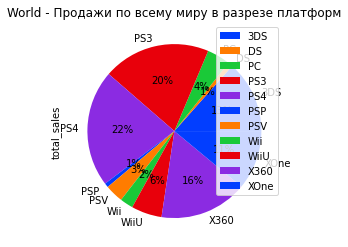

In [105]:
# применим цвета из библиотеки Seaborn (define Seaborn color palette to use)
colors = sns.color_palette('bright')[ 0:5 ]

#круговая диаграмма (create pie chart) 
data_base.groupby(['platform']).sum().plot(
    kind='pie', y='total_sales', 
  autopct='%1.0f%%', colors=colors,
    title='World - Продажи по всему миру в разрезе платформ')

Топ 5 платформ
Круговые диаграммы(Топ 5 - платформ ) наглядно нам показывают что, в Северной Америке лидер платформа  - X360 и PS4. В Европе лидер - PS4 и PS3. 
В Японии  лидер- 3DS и PS3. В Других регионах лидер - PS4 и PS3. Можно сделать вывод о стабильности PS4  в Мире кроме Японии, и платформа PS3 стабильна по миру , точнее игры на этих платформах либо возможна одна конкретная игра.

Доли по регионам к мировым продажам.
В результате мы наблюдаем , что в Северной Америке и Европе два лидера совпадают - это PS4 - 33.94% и 44.40% соответственно,и XOne - 58.29% и 32,56% соответственно.
В Северной америке также популярна платформа PC - 27.01% и 3DS - 24.02. А в Европе популярны такие платформы как PC - 66.08% и PS3 - 35.74%.
В Японии доли продаж составляют следующие показатели: платформа 3DS - 54.87%,  PS4 - 6.40%, PS3 - 24,33%, PSV - 80.09%
В других регионах доли продаж разбиваются на следующие данные: PS4 -15.39%, PS3 - 14.98%, XOne - 8.97%, X360 - 8.62%, 3DS - 4.56% .
 
 В целом по миру игры на платформе PS4 занимают лидирующие позиции.

**•	Теперь посмотрим самые популярные жанры (топ-5) по регионам(NA,EU,JP) за актуальный период 2012-2016гг.**

In [106]:
genre_na = data_base.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5) # посмотрим лидеров в NA по жанрам

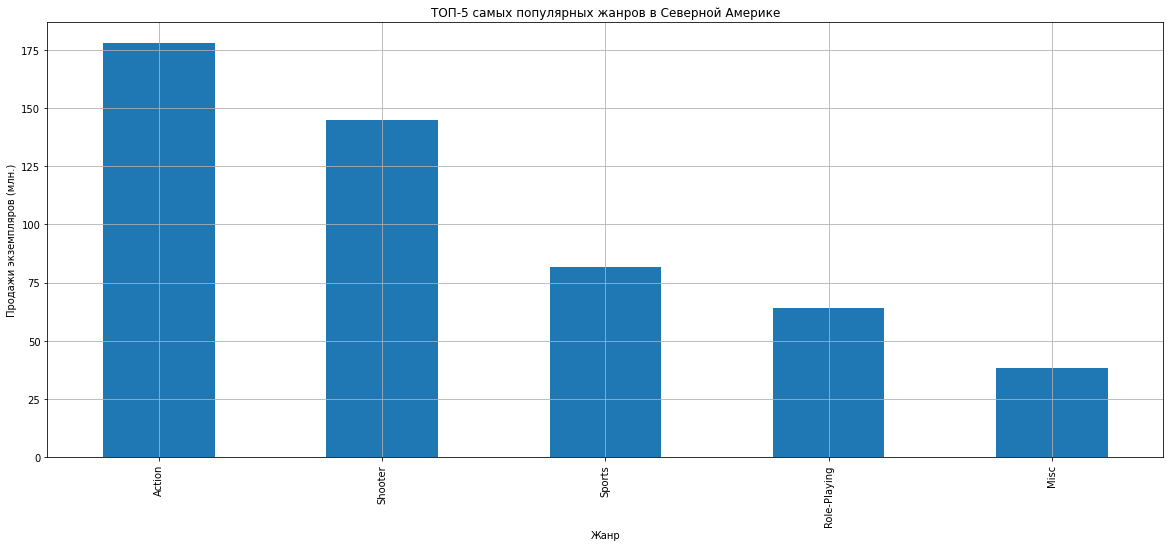

In [107]:
#  Построим график при помощи метода plot
genre_na.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')

plt.xlabel('Жанр')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()  

In [108]:
genre_eu = data_base.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5) # посмотрим лидеров в EU по жанрам

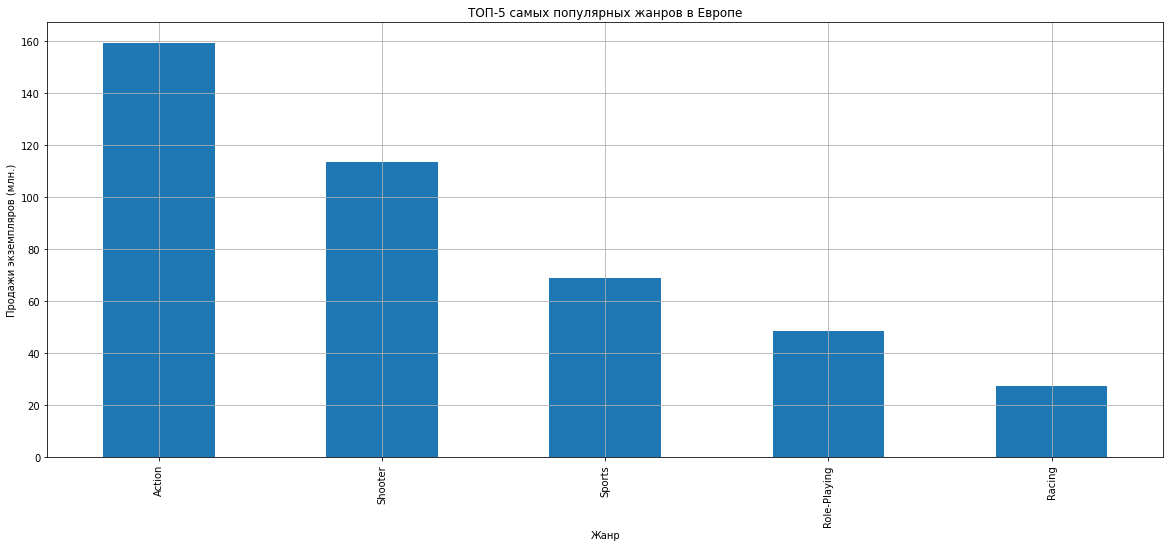

In [109]:
genre_eu.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Европе')

plt.xlabel('Жанр')

plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [110]:
genre_jp = data_base.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5) # посмотрим лидеров в JP по жанрам

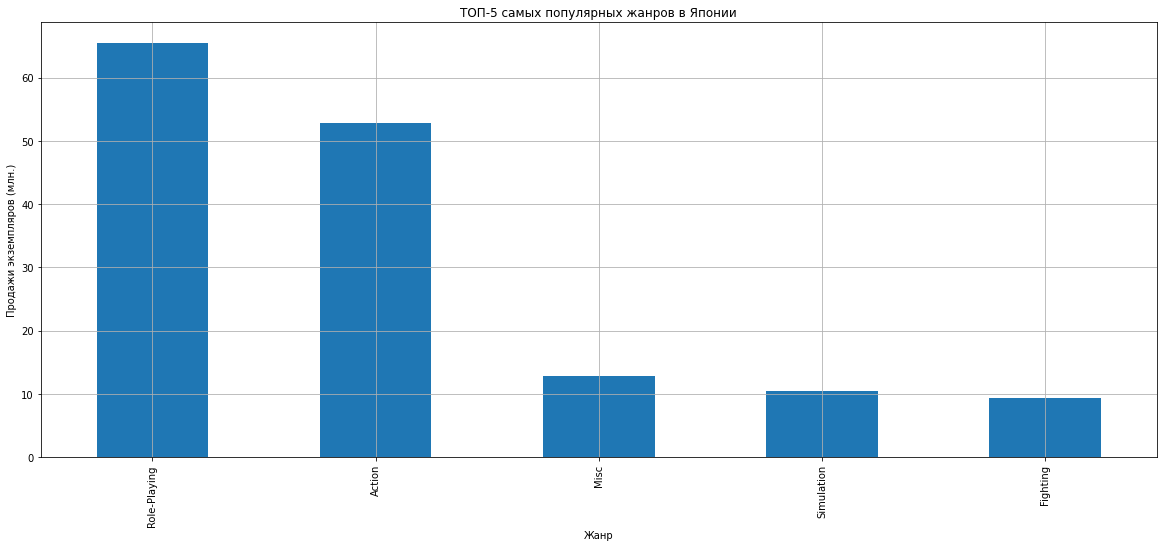

In [111]:
genre_jp.plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Японии') #построим гистограмму

plt.xlabel('Жанр') # название оси х

plt.ylabel('Продажи экземпляров (млн.)') # название оси у
plt.show()

<AxesSubplot:title={'center':'NA - Северная Америка'}, ylabel='na_sales'>

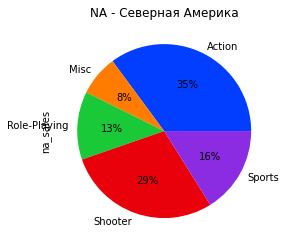

In [112]:

# применим цвета из библиотеки Seaborn (define Seaborn color palette to use)
colors = sns.color_palette('bright')[ 0:5 ]

#круговая диаграмма (create pie chart)
genre_na.groupby(['genre']).sum().plot(
    kind='pie', y='na_sales', 
  autopct='%1.0f%%', colors=colors,
    title='NA - Северная Америка')



<AxesSubplot:title={'center':'EU - Европа'}, ylabel='eu_sales'>

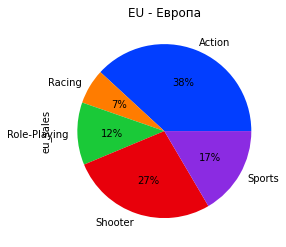

In [113]:
# применим цвета из библиотеки Seaborn (define Seaborn color palette to use)
colors = sns.color_palette('bright')[ 0:5 ]

#круговая диаграмма (create pie chart)
genre_eu.groupby(['genre']).sum().plot(
    kind='pie', y='eu_sales', 
  autopct='%1.0f%%', colors=colors,
    title='EU - Европа')



<AxesSubplot:title={'center':'JP - Япония'}, ylabel='jp_sales'>

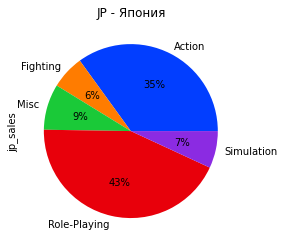

In [114]:
# применим цвета из библиотеки Seaborn (define Seaborn color palette to use)
colors = sns.color_palette('bright')[ 0:5 ]

#круговая диаграмма (create pie chart)
genre_jp.groupby(['genre']).sum().plot(
    kind='pie', y='jp_sales', 
  autopct='%1.0f%%', colors=colors,
    title='JP - Япония')

<AxesSubplot:title={'center':'Other - Другие регионы'}, ylabel='other_sales'>

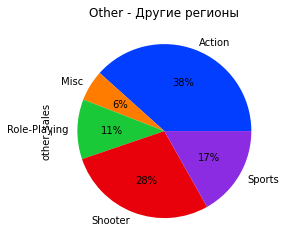

In [115]:
genre_other = data_base.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5) # посмотрим лидеров в др.регионах по жанрам
# применим цвета из библиотеки Seaborn (define Seaborn color palette to use)
colors = sns.color_palette('bright')[ 0:5 ]

#круговая диаграмма (create pie chart)
genre_other.groupby(['genre']).sum().plot(
    kind='pie', y='other_sales', 
  autopct='%1.0f%%', colors=colors,
    title='Other - Другие регионы')


<AxesSubplot:title={'center':'World'}, ylabel='total_sales'>

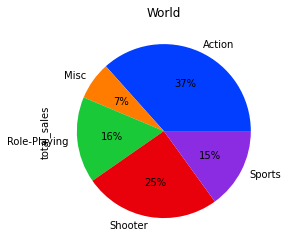

In [116]:
genre_world = data_base.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5) # посмотрим лидеров по миру по жанрам
# применим цвета из библиотеки Seaborn (define Seaborn color palette to use)
colors = sns.color_palette('bright')[ 0:5 ]

#круговая диаграмма (create pie chart)
genre_world.groupby(['genre']).sum().plot(
    kind='pie', y='total_sales', 
  autopct='%1.0f%%', colors=colors,
    title='World')

В целом по миру лидируют жанры Action и Shooter.

Круговые диаграммы(Топ 5 - жанров) наглядно нам показывают что, в Северной Америке и Европе идентичные предпочтения к жанрам - Action, Shooter,  Sports, Role-Playing. Отличаются последние столбики в Северной Америке - Misc, а в Европе это Racing. На это повлияло скорее всего сходство культур, ценностей и многое др.

В Японии состав топ 5 жанров следующий -  Role-Playing,Action, Misc, Simulator, Fighting.  Как видим в Японии Role-Playing на первом месте, а Shooter и вовсе не пользуется спросом. Японская культура несколько отличается от западных ценностей. 

в Северной Америке и Европе проявляют интерес к стрелялкам, а в Японии интересны боевые исскуства.


**Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Мы уже писали об этом выше, что этот рейтинг был создан в 1994г в США и Канаде, соответственно не у всех игр есть такой рейтинг. 

In [117]:
rating_na = data_base.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

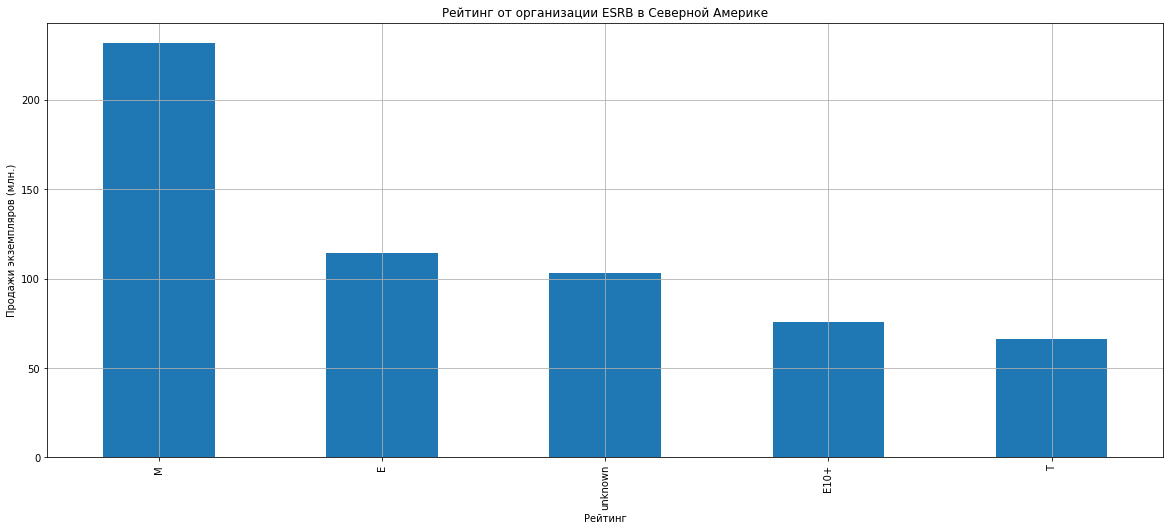

In [118]:
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')# построим график

plt.xlabel('Рейтинг') # название оси х 

plt.ylabel('Продажи экземпляров (млн.)') # название оси у 
plt.show()

В Северной Америке на первом месте продажи в категории "M" («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.). На втором месте "Т"(подросткам), на 3-4 местах категории "unknown"(не определен) - для всех  и "Е10+"(от 10лет и старше).

In [119]:
rating_eu = data_base.groupby('rating')['eu_sales'].sum().sort_values(ascending=False) # группируем по рейтингу

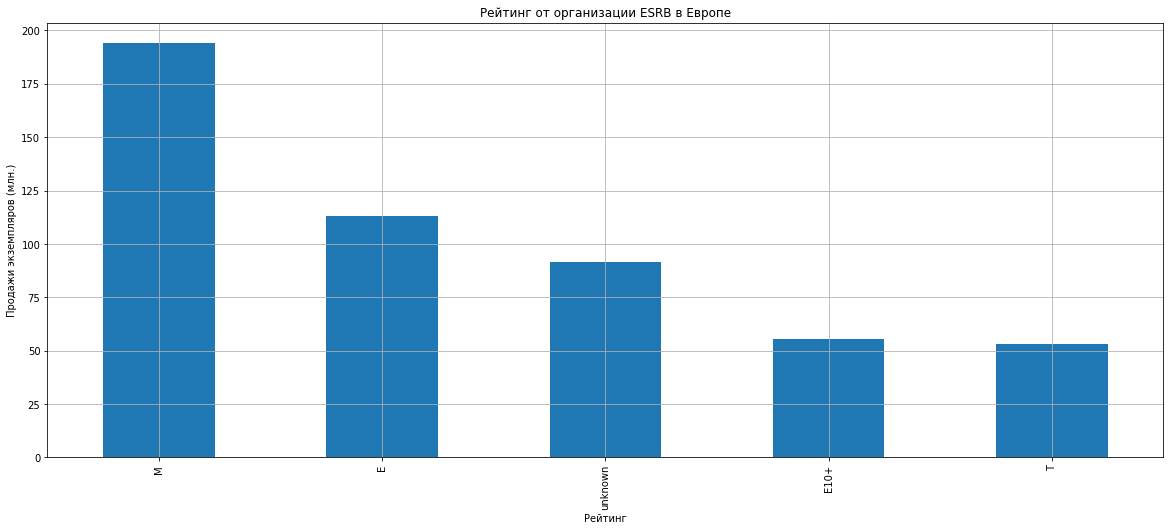

In [120]:
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Европе')

plt.xlabel('Рейтинг') # название оси х

plt.ylabel('Продажи экземпляров (млн.)')# название оси у
plt.show()

В Европе почти все также как и в Северной Америке на первом месте продажи в категории "M" («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.). На втором месте "Е" - для всех, на 3-4 местах категории "unknown"(не определен) и "Е10+"(от 10лет и старше). 

In [121]:
rating_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False) # группируем по рейтингу

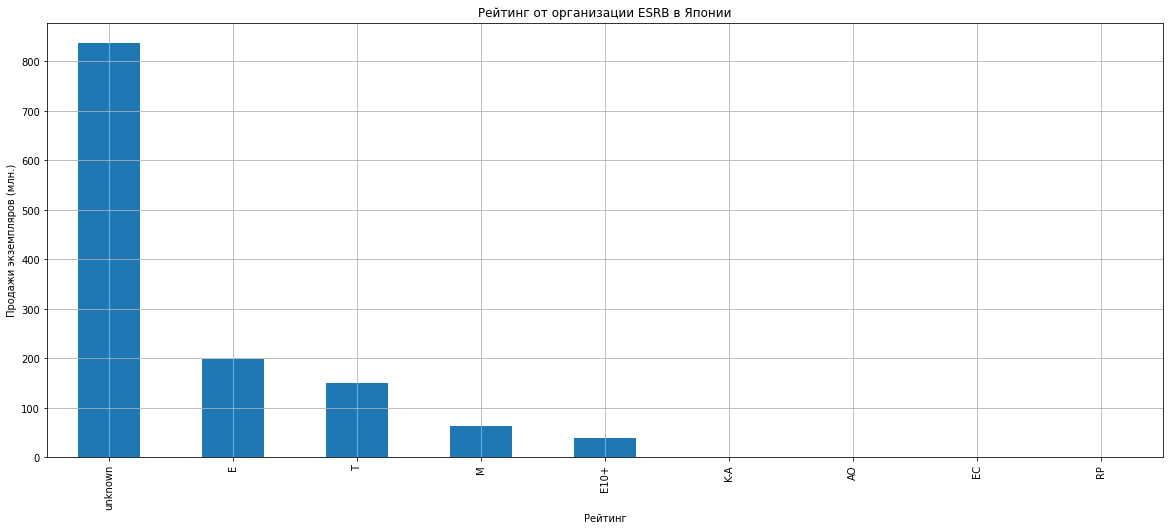

In [122]:
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Японии')# построим гистограмму

plt.xlabel('Рейтинг') # название оси х

plt.ylabel('Продажи экземпляров (млн.)') # название оси у
plt.show()

В Японии преобладает категория "unknown"(не определен), потому что этот рейтинг был создан в США  и Канаде, и не распространен в Японии, следовательно не логично и не считаю возможным как то понятно определить влияние рейтинга ESRB  в Японии.


In [123]:
# Комментарий ревьюера
temp = data[data.year_of_release > 2014].copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknown    513
T          192
E          153
M          149
E10+       101
Name: rating, dtype: int64

Выводы:

**Портрет пользователя Северной Америки:**

Топ 5 популярных платформ, в порядке убывания :Х360, PS4, PS3, XOne, 3DS.

Топ 5 популярных жанров игр, в порядке убывания: Action, Shooter,  Sports, Role-Playing, Misc

Преобладают игры рейтинга M (Для взрослых) и при этом есть много игр с неопределенным рейтингом, поэтому здесть сложно что-то сказать однозначно.

**Портрет пользователя Европы:**

Топ 5 популярных платформ, в порядке убывания: PS4, PS3, Х360,XOne,3DS

Топ 5 популярных жанров игр, в порядке убывания: Action, Shooter,  Sports, Role-Playing, Racing

Преобладают игры рейтинга M (Для взрослых) и при этом есть много игр с неопределенным рейтингом, поэтому здесть сложно что-то сказать однозначно.


**Портрет пользователя Японии:**

Топ 5 популярных платформ, в порядке убывания: 3DS, PS3, PS4,PSV, WiiU. 

Топ 5 популярных жанров игр, в порядке убывания: Role-Playing,Action, Misc,Simulator, Fighting

Рейтинг не актуален и не информативен в Японии

**5. Проверем гипотезы**

**•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**



H0 - cредние пользовательские рейтинги платформ X360 и PSP одинаковые

H1 - cредние пользовательские рейтинги платформ X360 и PSP разные.

Критический уровень значимости alpha = .01

In [124]:
from scipy import stats as st

In [125]:
#Сформируем данные для проверки гипотезы
xone = data_base.query(' platform == "XOne" ')['user_score'].dropna() # отфильтруем 
pc = data_base.query(' platform == "PC" ')['user_score'].dropna() # отфильтруем 
#Рассчитаем средние значения
xone_mean = data_base.query(' platform == "XOne" ')['user_score'].mean()
pc_mean = data_base.query(' platform == "PC" ')['user_score'].mean()

print('Средний пользовательский рейтинг Xbox One: {:.3}\n'
     'Средний пользовательский рейтинг PC: {:.2}'.format(xone_mean, pc_mean))

Средний пользовательский рейтинг Xbox One: 6.52
Средний пользовательский рейтинг PC: 6.4


In [126]:
#Рассчитаем дисперсии

print('Дисперсия XOne =', np.var(xone)) 

print('Дисперсия PC =',  np.var(pc))

Дисперсия XOne = 1.8965188
Дисперсия PC = 2.7569952


In [127]:
alpha = .01

results = st.ttest_ind(xone, pc,equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489560463017016
Не получилось отвергнуть нулевую гипотезу


**В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var) . False применяем потому что , наши выборки не равны и отличаются примерно на 32%.**

**Не получилось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов у платформ Xbox One и PC , а значит есть большая вероятность того, что средние пользовательские рейтинги одинаковые.
Как мы выяснили ранее, средний пользовательский рейтинг для PC 6.52, а для ХOne 6.4, что подтверждает нашу проверку.**

**•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

H0: средние пользовательские рейтинги жанров Action и Sports одинаковые
    
H1: cредние пользовательские рейтинги жанров Action и Sports разные

Критический уровень значимости Alpha = .01

In [128]:
#Сформируем данные для проверки гипотезы
action = data_base.query('genre == "Action"')['user_score'].dropna()
sports = data_base.query('genre == "Sports"')['user_score'].dropna()

#Рассчитаем средние значения
action_mean = data_base.query('genre == "Action"')['user_score'].mean()
sports_mean = data_base.query('genre == "Sports"')['user_score'].mean()

print('Средний пользовательский рейтинг Action: {:.3}\n'
     'Средний пользовательский рейтинг Sports: {:.2}'.format(action_mean, sports_mean))

Средний пользовательский рейтинг Action: 6.83
Средний пользовательский рейтинг Sports: 5.5


In [129]:
#Рассчитаем дисперсии
print('Дисперсия Action =', np.var(action))    
print('Дисперсия Sports =',  np.var(sports))

Дисперсия Action = 1.885472
Дисперсия Sports = 3.0073884


In [130]:
alpha = .01

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.242899260229549e-20
Отвергаем нулевую гипотезу


**Если параметр equal_var не указывать, то по умолчанию он примет значение True. 
Мы использовали метод scipy.stats.ttest_ind (array1, array2, equal_var = False),False применили, потому что дисперсии наших выборок отличаются примерно на 41%.Допускаем что наши выборки неравны.**

**Отвергаем Н0 гипотезу о том, что средние пользовательских рейтинги у платформ  Action и Sports одинаковые.**

**Большая вероятность , что средние пользовательских рейтинги у платформ  Action и Sports разные(Н1).**

**Средний пользовательский рейтинг для Action 6,83, а для Sports 5,5.**

**6.Общий вывод**

При работе с проектом были выполнены следующие шаги:

Открыт файл с данными и изучена общая информация

Данные подготовлены:

скорректированы названия всех колонок

произведено изменение типа данных

обработаны пропуски и дубли

посчитаны суммарные продажи во всех регионах

Проведен исследовательский анализ данных:

использовали актуальный период с 2012г по 2016г

изменение продаж по платформам

лидирующие платформы по продажам

влияние отзывов на уровень продаж

общее распределение игр по жанрам

Составлен портрет пользователя каждого региона:
самые популярные платформы,
самые популярные жанры,
влияние рейтинга ESRB на продажи в отдельном регионе.

Проверены гипотезы:
средние пользовательские рейтинги платформ Xbox One и PC

средние пользовательские рейтинги жанров Action и Sports

При планировании продаж на 2017 год стоит принять во внимание следующие аспекты:

Общие продажи падают,  за последние 2012-2016 гг. общие продажи по миру составили 600-400 млн копий.

ТОП-5 платформ, выпускающих игры в настоящий момент - PS4, PS3, X360, XOne, 3DS.

Рост количества выпускаемых игр наблюдается по платформам - PS4 , XOne , PC.

Лидер по продажам  платформы - PS4	за 2012- 2016гг составляют 314,14млн, 3DS -194,61млн  XOne - 159,32млн 

Оценки как критиков, так и пользователей игр не имеют сильного влияния на объемы продаж, хотя оценка критиков  коррелирует с объемами продаж незначительно больше, чем оценка пользователей.

ТОП- жанров по итогам исследования  1.Action , 2.Shooter, 5.Role-Playing, 4.Sports.

В отношении каждого региона можно отметить следующее:

В странах Северной Америки самой популярной платформой, является X360, а жанром - Action;
В Европе самой популярной платформой, является PS4, а жанром - Action;
в Японии лидерами являются - платформа 3DS и жанр Role-Playng;

-- В Северной Америке на первом и втором местах продажи по рейтингу ESRB в категории "М" -  («Для взрослых»: Материалы игры не ---подходят для подростков младше 17 лет.) и "Е" - подросткам.
--В Европе на первом и втором местах продажи по рейтингу ESRB в категории "М" -  («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.) и "Е" - Для всех.
 -- В Японии  рейтинг ESRB не актуален.

Проверили гипотезы и опровергли предположения о том, что:

cредние пользовательские рейтинги платформ X360 One и PSP одинаковые; средние пользовательские рейтинги жанров Action и Sports одинаковые.

Не получилось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов у платформ Xbox One и PC ;

Отвергаем Н0 гипотезу о том, что средние пользовательских рейтинги у платформ Action и Sports одинаковые.

**Рекомендации
В 2017 году потратить средства из рекламного бюджета в силу его ограниченности, первое, на игры платформы PS4 в жанре Action( ориентируемся на NA,EU, Oher) и  второе на игры платформы 3DS в жанре Role- Playng(Япония), считаю целесообразным и прибыльным делом**

